# ***Bank Indessa Loan Defaulter Prediction*** #





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/task

/content/drive/MyDrive/task


In [ ]:
pwd

'/content/drive/MyDrive/task'

We'll use `pandas` to parse the csv files.   

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/task/ML_Artivatic_dataset/train_indessa.csv') 

We'll also define the target column right away.

In [ ]:
# Class Label : Binary Classification
train_target = pd.DataFrame(df['loan_status']) 

Let's take a look at the first few rows of the table just to see what's in there.   

In [ ]:
df.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


What's the distribution of our target variable?
 

In [ ]:
df['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

What all columns are present in the dataframe? 

In [ ]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

###**2. Data Preprocessing**



###2.1 Term Feature

We'll do some preprocessing for the `term` attribute.

In [ ]:
# Replaces months string with '' 
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

# Convert it to numeric
df['term'] = pd.to_numeric(df['term'], errors='coerce')

Let's have a look at the unique value distribution of the `term` column.

In [ ]:
df['term'].value_counts() 

36    372793
60    159635
Name: term, dtype: int64

###2.2 Employment Length Feature

We'll do some preprocessing for the `emp_length` attribute.

In [ ]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce') 

Let's have a look at the unique value distribution of the `emp_length` column.

In [ ]:
df['emp_length'].value_counts()

10.0    175105
2.0      47276
0.0      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64

###2.3 Sub Grade Feature

We'll do some preprocessing for the `sub_grade` attribute.

In [ ]:
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce') 

Let's have a look at the unique value distribution of the `sub_grade` column.

In [ ]:
df['sub_grade'].value_counts() 

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64

###2.4 Last Week Pay Feature

We'll do some preprocessing for the `last_week_pay` attribute.

In [ ]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

###**3. Handling Missing Values**

Now, we'll see how many null values does each attribute have.

In [ ]:
df.isnull().sum() 

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [ ]:
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)  # Filling NaN values with median of each column present in columns.

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    df[col].fillna(0, inplace=True)        ## Filling NaN values with 0 for each column present in columns.

In [ ]:
# Converts categorical variable into dummy/indicator variables.
cate_attr = ['home_ownership', 'purpose']
for cat in cate_attr:
   df_col = [cat]
   df[cat] = df[cat].astype("category")
   df[cat] = pd.get_dummies(df, columns=df_col) 

###**4. Feature Engineering**

For convenience, I'll copy the original Dataframe to another variable and drop the target feature. 

In [ ]:
final_df = df.copy()
final_df = final_df.drop(['loan_status'], axis=1)  

Now, we'll create some new features which can help us in predicting the target (Defaulter or Non-Defaulter).

In [ ]:
import math
import numpy as np

# How big the loan a person has taken with respect to his earnings, annual income to fund by bank ratio
final_df['income_to_loan'] = np.round_(final_df['annual_inc']/final_df['funded_amnt'], decimals = 2)

# How big the loan a person has taken with respect to his earnings, annual income to fund by investors ratio
final_df['income_to_loan_inv'] = np.round_(final_df['annual_inc']/final_df['funded_amnt_inv'], decimals = 2)


# Interest paid so far = interest received till date + Late fee received till date
final_df['total_int_paid'] = final_df['total_rec_int'] + final_df['total_rec_late_fee']

# Calculating EMIs (monthly)
#EMI = [P x R x (1+R)^N] / [(1+R)^N-1]
principal = final_df['loan_amnt']
rate = final_df['int_rate'] /(100*12)
time = final_df['term']

final_df['emi_per_month'] = np.round_((principal * rate * (1+rate)**time)/((1+rate)**(time)-1), decimals = 2)

# Calculating EMIs paid (in terms of percent) np.round_(in_array, decimals = 2)
final_df['emi_paid_perc'] = np.round_(((final_df['last_week_pay'])/(final_df['term']/12*52+1))*100, decimals = 2)

We engineered 5 new columns which can provide us with accurate information to predict our labels.

In [ ]:
final_df.shape

(532428, 49)

###**5. Attribute Vectorization**

We'll use TDIDF and NLTK to vectorize some of our categorical columns. TFIDF will create feature matrices for each attribute we pass, hence increasing the dimensions. 

We'll download NLTK stopwords for English Language.

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We'll fill remaining columns with a string called 'missing'.

In [ ]:
cols = ['grade', 'emp_title', 'verification_status_joint', 'verification_status',
        'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']

for col in cols:
    final_df[col].fillna('missing', inplace=True)

Finally, if we have any left out columns, we'll fill them with 0.

In [ ]:
final_df.fillna(0)  
final_df.reset_index(inplace=True)  # Resets the indices.

###5.1 Vectorising Grade Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

x_tfidf = v.fit_transform(final_df['grade'])   # Create a feature matrix using TFIDF.

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names())

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([final_df, df_tfidf], axis=1)

# Finally, we drop the 'grade' feature as we have a more dimensional feature matrix.
res_train.drop('grade',axis=1,inplace=True)

print(res_train.shape)

(532428, 6)
(532428, 55)


###5.2 Vectorising Verification Status Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['verification_status'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'verification_status' feature as we have a more dimensional feature matrix.
res_train.drop('verification_status',axis=1,inplace=True)

print(res_train.shape)

(532428, 3)
(532428, 57)


###5.3 Vectorising Verification Status Joint Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['verification_status_joint'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'verification_status_joint' feature as we have a more dimensional feature matrix.
res_train.drop('verification_status_joint',axis=1,inplace=True)

print(res_train.shape)

(532428, 4)
(532428, 60)


###5.4 Vectorising Payment Plan Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['pymnt_plan'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'pymnt_plan' feature as we have a more dimensional feature matrix.
res_train.drop('pymnt_plan',axis=1,inplace=True)

print(res_train.shape)

(532428, 2)
(532428, 61)


###5.5 Vectorising Address State Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['addr_state'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'addr_state' feature as we have a more dimensional feature matrix.
res_train.drop('addr_state',axis=1,inplace=True)

print(res_train.shape)

(532428, 46)
(532428, 106)


###5.6 Vectorising Initial List Status Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['initial_list_status'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'initial_list_status' feature as we have a more dimensional feature matrix.
res_train.drop('initial_list_status',axis=1,inplace=True) 

print(res_train.shape)

(532428, 2)
(532428, 107)


###5.7 Vectorising Application Type Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['application_type'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'application_type' feature as we have a more dimensional feature matrix.
res_train.drop('application_type',axis=1,inplace=True) 

print(res_train.shape)

(532428, 2)
(532428, 108)


Finally, we'll drop all the unwanted columns which provide us with no information about the target and they also increase data complexity with size.

In [ ]:
res_train.drop(['desc', 'zip_code', 'emp_title', 'title', 'batch_enrolled'], axis=1, inplace=True)

What's the dimensions of the dataframe now?

In [ ]:
res_train.shape

(532428, 103)

As you see we increased to dimensions to 103 using TFIDF, you can try using Bag of Words also, but I prefer TFIDF.

Finally, we'll scale our dataframe values.

In [ ]:
def scaler():
    result = res_train.copy()
    for feature_name in res_train.columns:
        max_value = res_train[feature_name].max()
        min_value = res_train[feature_name].min()
        result[feature_name] = (res_train[feature_name] - min_value) / (max_value - min_value)
    return result 

We'll store the scaled dataframe in a new variable for better understanding.

In [ ]:
res_train_scaled = scaler() 

###**6. Train-Test Split**

We'll spit our data in training and cross-validation sets. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(res_train_scaled), np.array(train_target), test_size=0.30) 

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((372699, 103), (372699, 1), (159729, 103), (159729, 1))

We'll import a few necessary model evaluation metrics.

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score

###**7. Cat Boost **

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 67.3MB 87kB/s 


In [ ]:
#CATBoost
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1400, subsample=0.70, max_depth=6, scale_pos_weight=2.5, silent=True)
cat_clf.fit(X_train, y_train)

# evaluate predictions
y_train_predict_cat = cat_clf.predict(X_train)
print("==========================")
print('Train Accuracy: %.3f' % metrics.accuracy_score(y_train, y_train_predict_cat))

# make predictions for test data
y_pred_cat = cat_clf.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))
print("==========================")
print(metrics.confusion_matrix(y_test, predictions))
print("==========================")
print(metrics.classification_report(y_test, predictions))
print("==========================")
print('Precision Score: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score: %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions)) 

Train Accuracy: 0.944
ROC-AUC: 93.4659946115%
Test Accuracy: 0.939
[[114844   6979]
 [  2782  35124]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    121823
           1       0.83      0.93      0.88     37906

    accuracy                           0.94    159729
   macro avg       0.91      0.93      0.92    159729
weighted avg       0.94      0.94      0.94    159729

Precision Score: 0.834
Recall Score: 0.927
F1 Score: 0.878


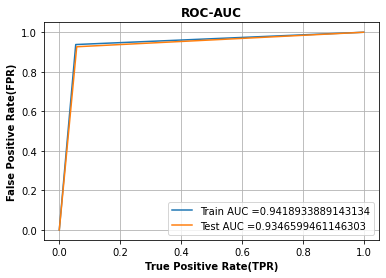

In [ ]:
y_train_pred = cat_clf.predict(X_train)    
y_test_pred = cat_clf.predict(X_test)


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show() 

###**8. XGBoost **

In [ ]:
#XGBOOST
from xgboost import XGBClassifier

xg = XGBClassifier(scale_pos_weight=2.5 ,silent=True)
    
xg.fit(X_train, y_train)


# evaluate predictions
y_train_predict_xg = xg.predict(X_train)
print("==========================")
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_xg))

# make predictions for test data
y_pred_xg = xg.predict(X_test)
predictions = [round(value) for value in y_pred_xg]

accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


print('Test Accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print("==========================")
print(metrics.confusion_matrix(y_test, predictions))
print("==========================")
print(metrics.classification_report(y_test, predictions))
print("==========================")
print('Precision Score %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_test, predictions)) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy 0.927
ROC-AUC: 90.0610394881%
Test Accuracy 0.926
[[115627   6196]
 [  5607  32299]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    121823
           1       0.84      0.85      0.85     37906

    accuracy                           0.93    159729
   macro avg       0.90      0.90      0.90    159729
weighted avg       0.93      0.93      0.93    159729

Precision Score 0.839
Recall Score 0.852
F1 Score 0.846


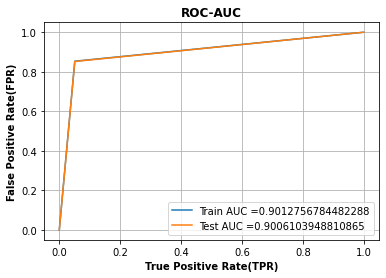

In [ ]:
y_train_pred = xg.predict(X_train)    
y_test_pred = xg.predict(X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show() 

###**10. Save Model using Joblib**

In [ ]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(xg, 'xgboost.pkl') 
joblib.dump(cat_clf, 'catboost.pkl') 


In [ ]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: !pip install prettytable

x = PrettyTable()
x.field_names = ["Model Used", "ROC-AUC","Test Accuracy(%)", "Precision"]
'''

ROC-AUC: 93.4659946115%
Test Accuracy: 0.939
======================
'''
x.add_row(["CatBoost Classifier",  93.46, 93.9, 0.834])
x.add_row(["XGBoost Classifier",  90.06, 92.6, 0.839])


print(x)

+---------------------+---------+------------------+-----------+
|      Model Used     | ROC-AUC | Test Accuracy(%) | Precision |
+---------------------+---------+------------------+-----------+
| CatBoost Classifier |  93.46  |       93.9       |   0.834   |
|  XGBoost Classifier |  90.06  |       92.6       |   0.839   |
+---------------------+---------+------------------+-----------+


###**11. Conclusion**

- CatBoost is the clear winner here and all the models have done a good job.
